In [91]:
import numpy as np
import matplotlib.pyplot as plt
# A library for data manipulation and analysis.
import pandas as pd

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 

# Set a seed so that the results are consistent.
np.random.seed(3) 

In [107]:
path = "data/tvmarketing.csv"
adv = pd.read_csv(path)

In [108]:
adv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


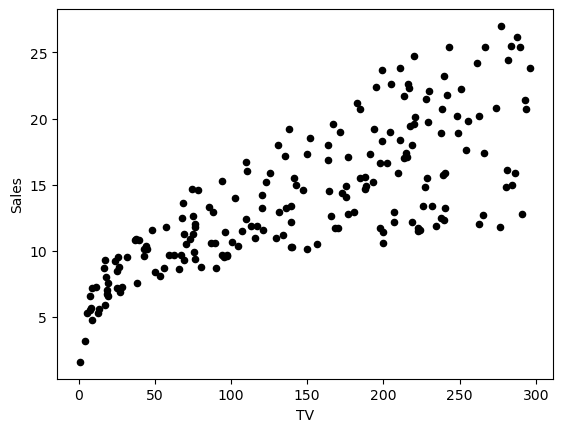

In [109]:
adv.plot(x='TV',y='Sales',kind='scatter',c='black')
plt.show()

In [110]:
adv_norm = (adv - np.mean(adv))/np.std(adv)

c:\Users\saksh\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


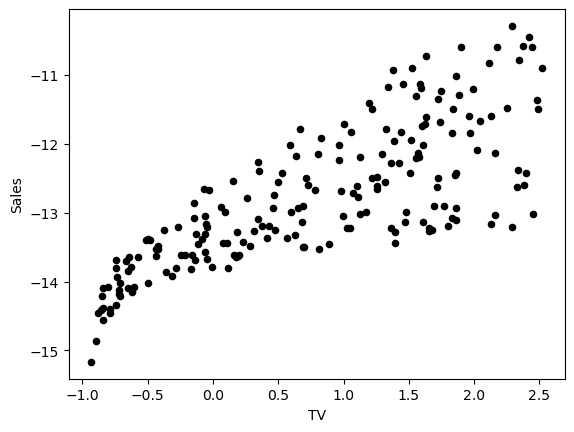

In [111]:
adv_norm.plot(x='TV', y='Sales', kind='scatter', c='black')
plt.show()

In [118]:
X_norm = adv['TV']
Y_norm = adv['Sales']
X_norm = np.array(X_norm).reshape(1,len(X_norm))
Y_norm = np.array(Y_norm).reshape(1,len(Y_norm))

print('The shape of X_norm:' + str(X_norm.shape))
print('The shape of Y_norm:' + str(Y_norm.shape))
print('I  have m = %d training examples!' %(X_norm.shape[1]))

The shape of X_norm:(1, 200)
The shape of Y_norm:(1, 200)
I  have m = 200 training examples!


In [119]:
def layer_sizes(X,Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]

    return (n_x,n_y)

(n_x, n_y) = layer_sizes(X_norm,Y_norm)
print(n_x,n_y)

1 1


In [120]:
def initialize_parameters(n_x,n_y):
    W = np.random.randn(n_y,n_x) * 0.01
    b = np.zeros((n_y,1))

    parameters = {"W": W,
                  "b": b}
    
    return parameters

parameters = initialize_parameters(n_x,n_y)
print('W = ', parameters["W"])
print('b = ', parameters["b"])

W =  [[-0.01863493]]
b =  [[0.]]


In [121]:
def forward_propagation(X,parameters):

    W = parameters["W"]
    b = parameters["b"]

    Z = np.matmul(W,X) + b
    Y_hat = Z

    return Y_hat

Y_hat = forward_propagation(X_norm,parameters)

print(Y_hat[0,0:5])


[-4.28789671 -0.82925425 -0.32052074 -2.82319145 -3.36919481]


In [122]:
def compute_cost(Y_hat, Y):
    """
    Computes the cost function as a sum of squares
    
    Arguments:
    Y_hat -- The output of the neural network of shape (n_y, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    cost -- sum of squares scaled by 1/(2*number of examples)
    
    """
    # Number of examples.
    m = Y_hat.shape[1]

    # Compute the cost function.
    cost = np.sum((Y_hat - Y)**2)/(2*m)
    
    return cost

print("cost = " + str(compute_cost(Y_hat, Y_norm)))

cost = 161.80596044057603


In [123]:
def backward_propagation(Y_hat,X,Y):

    m = X.shape[0]
    dZ = Y_hat - Y
    dW = 1/m * np.dot(dZ,X.T)
    db = 1/m * np.sum(dZ,axis=1, keepdims=True)

    grads = {"dW": dW,
             "db": db}
    
    return grads

grads = backward_propagation(Y_hat, X_norm, Y_norm)

print("dW = " + str(grads["dW"]))
print("db = " + str(grads["db"]))


dW = [[-590025.40864085]]
db = [[-3352.52525167]]


In [124]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule
    
    Arguments:
    parameters -- python dictionary containing parameters 
    grads -- python dictionary containing gradients 
    learning_rate -- learning rate parameter for gradient descent
    
    Returns:
    parameters -- python dictionary containing updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]
    
    # Retrieve each gradient from the dictionary "grads".
    dW = grads["dW"]
    db = grads["db"]
    
    # Update rule for each parameter.
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters

parameters_updated = update_parameters(parameters, grads)

print("W updated = " + str(parameters_updated["W"]))
print("b updated = " + str(parameters_updated["b"]))

W updated = [[708030.47173409]]
b updated = [[4023.030302]]


In [125]:
def nn_model(X,Y,num_iterations=10,learning_rate=1.2,print_cost=False):
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[1]

    parameters = initialize_parameters(n_x,n_y)

    for i in range(0,num_iterations):
        Y_hat = forward_propagation(X,parameters)

        cost = compute_cost(Y_hat,Y)

        grads = backward_propagation(Y_hat,X,Y)

        parameters = update_parameters(parameters,grads,learning_rate)

        if print_cost:
            print("cost after iteration %i: %f" %(i,cost))
    
    return parameters



In [126]:
parameters_simple = nn_model(X_norm, Y_norm, num_iterations=30, learning_rate=1.2, print_cost=True)
print("W = " + str(parameters_simple["W"]))
print("b = " + str(parameters_simple["b"]))

W_simple = parameters["W"]
b_simple = parameters["b"]

cost after iteration 0: 118.656082
cost after iteration 1: 5174273528368620.000000
cost after iteration 2: 249895845716451975576814616576.000000
cost after iteration 3: 12068927814548693044717136484549800130248704.000000
cost after iteration 4: 582878911712926846343453871381191615469293526115327934464.000000
cost after iteration 5: 28150622071837328325406133536547830229098481004547557713954875428044800.000000
cost after iteration 6: 1359557717918791369836909387392837633990926005938826206182213058955172326537829548032.000000
cost after iteration 7: 65660971314795228293187263889768511000066358367043511000618489975166266115139064960290444927827968.000000
cost after iteration 8: 3171151248070722983369913978885406713413894524253995988393920360217703581791661792731782388263910885208298094592.000000
cost after iteration 9: 153153388333665525983076581541643942826036022692862349277152243985329283505978337015269819697966182357183285135967835037630464.000000
cost after iteration 10: 7396670333006

C:\Users\saksh\AppData\Local\Temp\ipykernel_17848\651274294.py:17: RuntimeWarning: overflow encountered in square
  cost = np.sum((Y_hat - Y)**2)/(2*m)


In [127]:
df = pd.read_csv("data/house_prices_train.csv")

In [128]:
X_multi = df[['GrLivArea','OverallQual']]
Y_multi = df['SalePrice']

In [129]:
display(X_multi)
display(Y_multi)

,GrLivArea,OverallQual
0,1710,7
1,1262,6
2,1786,7
3,1717,7
4,2198,8
...,...,...
1455,1647,6
1456,2073,6
1457,2340,7
1458,1078,5


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
X_multi = np.array(X_multi)

In [132]:
Y_multi = np.array(Y_multi)

In [135]:
X_multi_norm = (X_multi - np.mean(X_multi))/np.std(X_multi)
Y_multi_norm = (Y_multi - np.mean(Y_multi))/np.std(Y_multi)

In [137]:
Y_multi_norm.shape
X_multi_norm.shape

(1460, 2)

In [138]:
X_multi_norm = np.array(X_multi_norm).T
Y_multi_norm = np.array(Y_multi_norm).reshape((1,len(Y_multi_norm)))


print ('The shape of X: ' + str(X_multi_norm.shape))
print ('The shape of Y: ' + str(Y_multi_norm.shape))
print ('I have m = %d training examples!' % (X_multi_norm.shape[1]))

The shape of X: (2, 1460)
The shape of Y: (1, 1460)
I have m = 1460 training examples!


In [139]:
parameters_multi = nn_model(X_multi_norm, Y_multi_norm, num_iterations=100, print_cost=True)

print("W = " + str(parameters_multi["W"]))
print("b = " + str(parameters_multi["b"]))

W_multi = parameters_multi["W"]
b_multi = parameters_multi["b"]

cost after iteration 0: 0.501576
cost after iteration 1: 92076.831958
cost after iteration 2: 462502525272.355286
cost after iteration 3: 2664709262180873728.000000
cost after iteration 4: 15372433912620244501790720.000000
cost after iteration 5: 88682982817035717742107983609856.000000
cost after iteration 6: 511608783065889692005112052102696271872.000000
cost after iteration 7: 2951451775951300710498957268849674496409337856.000000
cost after iteration 8: 17026813991792802261483844087828959980308265976201216.000000
cost after iteration 9: 98227047811982706950449234414150467883886484094661611749376.000000
cost after iteration 10: 566668134538164291008242732245985405190183822199865413011601620992.000000
cost after iteration 11: 3269087098246176673375600773690998959816626618694280754701717763172335616.000000
cost after iteration 12: 18859240187609066226208846549268478174507482286093898483347047967087468165988352.000000
cost after iteration 13: 108798245432109080526537501782202762514883994

C:\Users\saksh\AppData\Local\Temp\ipykernel_17848\651274294.py:17: RuntimeWarning: overflow encountered in square
  cost = np.sum((Y_hat - Y)**2)/(2*m)
c:\Users\saksh\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\saksh\AppData\Local\Temp\ipykernel_17848\1741438164.py:6: RuntimeWarning: invalid value encountered in matmul
  Z = np.matmul(W,X) + b
